# Paper plots

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.style.use('seaborn')
%matplotlib inline

import numpy as np
from sklearn.neighbors import KNeighborsClassifier

import pickle

! mkdir -p ./figures

In [2]:
GENERATE_DATA = False
TOY_DATA_FILE = 'toy_data.pkl'

In [3]:
if GENERATE_DATA:
    np.random.seed(42)
    gaussian_2d_one = np.random.multivariate_normal([1, 1], [[0.4, 0], [0, 0.5]], 50)
    gaussian_2d_two = np.random.multivariate_normal([3, 3], [[0.4, 0], [0, 0.5]], 50)

    gaussian_2d_two[23, 0] = gaussian_2d_two[23, 0] + .4
    gaussian_2d_two[23, 1] = gaussian_2d_two[23, 1] - .5
    #
    gaussian_2d_two[44, 0] = gaussian_2d_two[44, 0] - .1
    gaussian_2d_two[44, 1] = gaussian_2d_two[44, 1] - .1

    gaussian_2d_one[3, 0] = gaussian_2d_one[3, 0] + .5
    gaussian_2d_one[3, 1] = gaussian_2d_one[3, 1] - .3
    #
    gaussian_2d_one[15, 0] = gaussian_2d_one[15, 0] + .5
    gaussian_2d_one[15, 1] = gaussian_2d_one[15, 1] + .5

    gaussian_2d_X = np.concatenate([gaussian_2d_one, gaussian_2d_two])
    gaussian_2d_y = np.asarray(50 * [0] + 50 * [1])

    with open(TOY_DATA_FILE, 'wb') as f:
        pickle.dump(
            dict(gaussian_2d_one=gaussian_2d_one,
                gaussian_2d_two=gaussian_2d_two,
                gaussian_2d_X=gaussian_2d_X,
                gaussian_2d_y=gaussian_2d_y),
            f)
else:
    with open(TOY_DATA_FILE, 'rb') as f:
        _toy_data = pickle.load(f)

        gaussian_2d_one = _toy_data['gaussian_2d_one']
        gaussian_2d_two = _toy_data['gaussian_2d_two']
        gaussian_2d_X = _toy_data['gaussian_2d_X']
        gaussian_2d_y = _toy_data['gaussian_2d_y']

## two decision trees

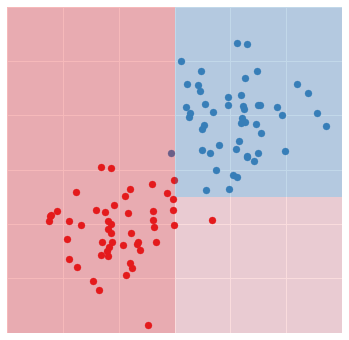

In [4]:
_f = plt.figure(figsize=(6, 6))

c_1 = np.asarray([plt.cm.Set1(0)])  # np.asarray([plt.cm.Pastel1.colors[0]])
c_2 = np.asarray([plt.cm.Set1(1)])  # np.asarray([plt.cm.Pastel1.colors[1]])
c_3 = np.asarray([plt.cm.Set1(4)])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.scatter(gaussian_2d_one[:, 0], gaussian_2d_one[:, 1], c=c_1)
plt.scatter(gaussian_2d_two[:, 0], gaussian_2d_two[:, 1], c=c_2)


r_r1 = Rectangle((-1.5,-1.5), 1.5+2, 1.5+5.5, color=c_1[0], alpha=0.3, fill=True, linewidth=0)  #, label='red')
r_r2 = Rectangle((2,-1.5), 5.5-2, 1.5+1.5, color=c_1[0], alpha=0.15, fill=True, linewidth=0)  # , label='red'
r_b1 = Rectangle((2,1.5), 5.5-2, 5.5-1.5, color=c_2[0], alpha=0.3, fill=True, linewidth=0)  # , label='blue')
_f.axes[0].add_patch(r_r1)
_f.axes[0].add_patch(r_r2)
_f.axes[0].add_patch(r_b1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelleft=False)

#pt = 15
#plt.scatter(gaussian_2d_one[pt, 0], gaussian_2d_one[pt, 1], c='black', s=82)

# plt.legend(loc='lower left', frameon=True, framealpha=.75)  # , facecolor='white'
plt.savefig('./figures/decision_tree_multiplicity_1.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

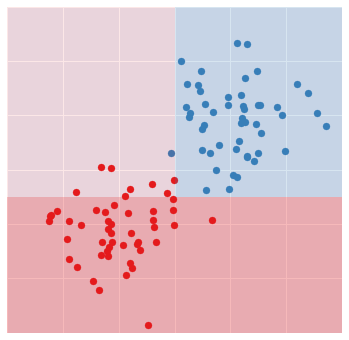

In [5]:
_f = plt.figure(figsize=(6, 6))

c_1 = np.asarray([plt.cm.Set1(0)])  # np.asarray([plt.cm.Pastel1.colors[0]])
c_2 = np.asarray([plt.cm.Set1(1)])  # np.asarray([plt.cm.Pastel1.colors[1]])
c_3 = np.asarray([plt.cm.Set1(4)])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.scatter(gaussian_2d_one[:, 0], gaussian_2d_one[:, 1], c=c_1)
plt.scatter(gaussian_2d_two[:, 0], gaussian_2d_two[:, 1], c=c_2)


r_r1 = Rectangle((-1.5, -1.5), 1.5+5.5, 1.5+1.5, color=c_1[0], alpha=0.3, fill=True, linewidth=0)  # , label='red') # (-1.5,1.5), 1.5+2, -(1.5+1.5)
r_r2 = Rectangle((-1.5, 1.5), 1.5+2, -1.5+5.5, color=c_1[0], alpha=0.1, fill=True, linewidth=0)  # , label='red') # (2,-1.5), 5.5-2, 1.5+1.5
r_b1 = Rectangle((2,1.5), 5.5-2, 5.5-1.5, color=c_2[0], alpha=0.2, fill=True, linewidth=0, label='blue')
_f.axes[0].add_patch(r_r1)
_f.axes[0].add_patch(r_r2)
_f.axes[0].add_patch(r_b1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelleft=False)

#pt = 15
#plt.scatter(gaussian_2d_one[pt, 0], gaussian_2d_one[pt, 1], c='black', s=82)

# plt.legend(loc='lower left', frameon=True, framealpha=.75)  # , facecolor='white'
plt.savefig('./figures/decision_tree_multiplicity_2.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

## Plot linear model multiplicity

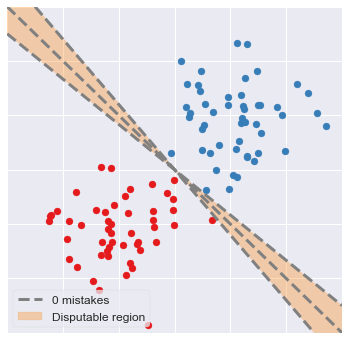

In [6]:
plt.figure(figsize=(6, 6))

c_1 = np.asarray([plt.cm.Set1(0)])  # np.asarray([plt.cm.Pastel1.colors[0]])
c_2 = np.asarray([plt.cm.Set1(1)])  # np.asarray([plt.cm.Pastel1.colors[1]])
c_3 = np.asarray([plt.cm.Set1(4)])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.scatter(gaussian_2d_one[:, 0], gaussian_2d_one[:, 1], c=c_1)
plt.scatter(gaussian_2d_two[:, 0], gaussian_2d_two[:, 1], c=c_2)

ls = dict(linewidth=3, color='grey', linestyle='--')
plt.plot((-1, 5), (5, -1), **ls, label='0 mistakes')
#plt.plot((0, 4), (5, -1), **ls)
# y = −1.2x + 4.4
plt.plot((-0.5, 4.5), (5, -1), **ls)
#plt.plot((-1, 5), (4, 0), **ls)
# y = −0.83x + 3.67
plt.plot((-1, 5), (4.5, -0.5), **ls)


plt.fill_betweenx((-1, -0.5, 4.5, 5),
                  (5.6, 5, -1, -1.6), (4.5, 4.085, -0.065, -0.5),
                  color=c_3, alpha=0.3,
                  label='Disputable region')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelleft=False)

#pt = 15
#plt.scatter(gaussian_2d_one[pt, 0], gaussian_2d_one[pt, 1], c='black', s=82)

plt.legend(loc='lower left', frameon=True, framealpha=.75, fontsize=12)  # , facecolor='white'
plt.savefig('./figures/linear_model_multiplicity.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

### One mistake

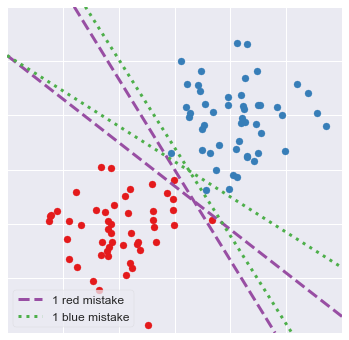

In [7]:
plt.figure(figsize=(6, 6))

c_1 = np.asarray([plt.cm.Set1(0)])
c_2 = np.asarray([plt.cm.Set1(1)])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.scatter(gaussian_2d_one[:, 0], gaussian_2d_one[:, 1], c=c_1)
plt.scatter(gaussian_2d_two[:, 0], gaussian_2d_two[:, 1], c=c_2)

ls_y = dict(linewidth=3, color=plt.cm.Set1(2), linestyle=':')  # 'yellow' # -.
ls_o = dict(linewidth=3, color=plt.cm.Set1(3), linestyle='--')  # 'orange'
# red mistake
plt.plot((0.2, 3.8), (5, -1), **ls_o, label='1 red mistake')
plt.plot((-1, 5), (4.1, -0.7), **ls_o)
# blue mistake
plt.plot((-1, 5), (4.1, 0.2), **ls_y, label='1 blue mistake')
plt.plot((0.4, 4.1), (5, -1), **ls_y)

plt.tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(
    axis='y', which='both', left=False, right=False, labelleft=False)

plt.legend(loc='lower left', frameon=True, framealpha=.75, fontsize=12)  # , facecolor='white'
plt.savefig('./figures/linear_model_multiplicity_1.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

### One mistake joined

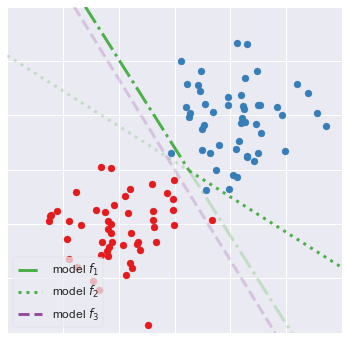

In [8]:
plt.figure(figsize=(6, 6))

c_1 = np.asarray([plt.cm.Set1(0)])
c_2 = np.asarray([plt.cm.Set1(1)])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.scatter(gaussian_2d_one[:, 0], gaussian_2d_one[:, 1], c=c_1)
plt.scatter(gaussian_2d_two[:, 0], gaussian_2d_two[:, 1], c=c_2)

ls_y_1 = dict(linewidth=3, color=plt.cm.Set1(2), linestyle=':')  # 'yellow' # -.
ls_y_2 = dict(linewidth=3, color=plt.cm.Set1(2), linestyle='-.')  # 'yellow' # -.
ls_o = dict(linewidth=3, color=plt.cm.Set1(3), linestyle='--')  # 'orange'
# blue mistake (swapped order)
## y = -60/37x + 209/37
plt.plot((0.4, 8135/3595), (5, 7115/3595), **ls_y_2, label='model $f_1$')  # 4.1, -1
plt.plot((8135/3595, 4.1), (7115/3595, -1), **ls_y_2, alpha=.25)  # 4.1, -1
## y = -0.65x + 3.45
plt.plot((8135/3595, 5), (7115/3595, 0.2), **ls_y_1, label='model $f_2$')  # -1, 4.1
plt.plot((-1, 8135/3595), (4.1, 7115/3595), **ls_y_1, alpha=0.25)  # -1, 4.1
# cut x = 8135/3595 = 2.26286509 | y1 = 7115/3595 | y2 = 7115/3595

plt.plot((0.0, 0.2), (7, 6), **ls_o, label='model $f_3$')
plt.plot((0.2, 3.8), (5, -1), **ls_o, alpha=0.25)

plt.tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(
    axis='y', which='both', left=False, right=False, labelleft=False)

plt.legend(loc='lower left', frameon=True, framealpha=.75, fontsize=12)  # , facecolor='white'
plt.savefig('./figures/linear_model_multiplicity_1_joined.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

### Two mistakes

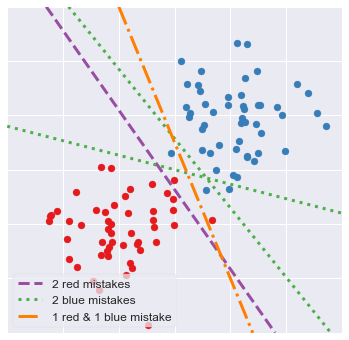

In [9]:
plt.figure(figsize=(6, 6))

c_1 = np.asarray([plt.cm.Set1(0)])
c_2 = np.asarray([plt.cm.Set1(1)])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.scatter(gaussian_2d_one[:, 0], gaussian_2d_one[:, 1], c=c_1)
plt.scatter(gaussian_2d_two[:, 0], gaussian_2d_two[:, 1], c=c_2)

ls_y = dict(linewidth=3, color=plt.cm.Set1(2), linestyle=':')  # 'yellow' # -.
ls_o = dict(linewidth=3, color=plt.cm.Set1(3), linestyle='--')  # 'orange'
ls_r = dict(linewidth=3, color=plt.cm.Set1(4), linestyle='-.')
# red mistake
plt.plot((-0.3, 3.8), (5, -1), **ls_o, label='2 red mistakes')
# blue mistake
plt.plot((0.1, 4.8), (5, -1.0), **ls_y, label='2 blue mistakes')
plt.plot((-1, 5), (2.8, 1.2), **ls_y)
# one of each
plt.plot((1.0, 3.4), (5, -1), **ls_r, label='1 red & 1 blue mistake')

plt.tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(
    axis='y', which='both', left=False, right=False, labelleft=False)

plt.legend(loc='lower left', frameon=True, framealpha=.75, fontsize=12)  # , facecolor='white'
plt.savefig('./figures/linear_model_multiplicity_2.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

## Complex boundary -- 2 mistakes

### Polynomial

In [10]:
def poly_gen(x, coef):
    y = 0
    for i, c in enumerate(coef):
        y += c * x**i
    return y

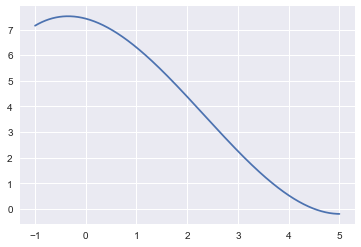

In [11]:
x = np.linspace(-1, 5, 700)
coeffs = .1*np.array([74.25, -5.25, -7, 1])
plt.plot(x, poly_gen(x, coeffs))
plt.show()

In [12]:
poly_data_1 = np.array([
    [-0.5, -1],
    [-0.5,  0],
    [-0.5,  1],
    [-0.5,  2],
    [-0.5,  3],
    [ 1  ,  3.5],
    [ 3  ,  1],
    [ 4  ,  1],
    [ 5  ,  2],
])
poly_data_2 = np.array([
    [-1.5, -1],
    [-1.0,  0],
    [-0.5,  1],
    [-0.5,  1.5],
    [ 1.0,  2],
    [ 3  ,  0.75],
    [ 4  ,  -0.25],
    [ 5  ,  2],
])
poly_data_3 = np.array([
    [-1.0, 1.7],
    [-0.5, 1.75],
    [ 0.0, 1.85],
    [ 0.5, 1.9],
    [ 1.0, 2.0],
    [ 1.5, 0.75],
    [ 2  ,  2.5],
    [ 3  ,  1.5],
    [ 4.5,  -0.5],
    [ 5  ,  2],
])
poly_data_4 = np.array([
    [-0.5, -1],
    [-0.5,  0],
    [-0.5,  1],
    [-0.5,  2],
    [-0.5,  3],
    [ 1  ,  3],
    [ 2  ,  2],
    [ 3  ,  1.25],
    [ 4  ,  2],
    [ 5  ,  5.25],
])

In [13]:
poly_1 = np.polynomial.polynomial.polyfit(poly_data_1[:, 0], poly_data_1[:, 1], 3)
poly_2 = np.polynomial.polynomial.polyfit(poly_data_2[:, 0], poly_data_2[:, 1], 4)
poly_3 = np.polynomial.polynomial.polyfit(poly_data_3[:, 0], poly_data_3[:, 1], 4)
poly_4 = np.polynomial.polynomial.polyfit(poly_data_4[:, 0], poly_data_4[:, 1], 4)

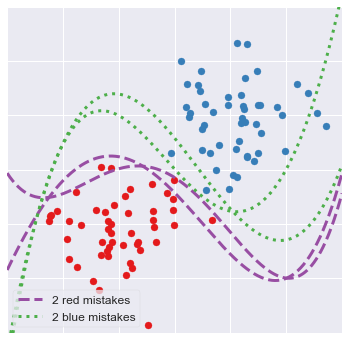

In [14]:
plt.figure(figsize=(6, 6))

c_1 = np.asarray([plt.cm.Set1(0)])
c_2 = np.asarray([plt.cm.Set1(1)])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.scatter(gaussian_2d_one[:, 0], gaussian_2d_one[:, 1], c=c_1)
plt.scatter(gaussian_2d_two[:, 0], gaussian_2d_two[:, 1], c=c_2)

plt.tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(
    axis='y', which='both', left=False, right=False, labelleft=False)

ls_y = dict(linewidth=3, color=plt.cm.Set1(2), linestyle=':')  # 'yellow' # -.
ls_o = dict(linewidth=3, color=plt.cm.Set1(3), linestyle='--')  # 'orange'
x = np.linspace(-1, 5, 600)
# two red
plt.plot(x, poly_gen(x, poly_2), **ls_o, label='2 red mistakes')
plt.plot(x, poly_gen(x, poly_3), **ls_o)
# two blue
plt.plot(x, poly_gen(x, poly_1), **ls_y, label='2 blue mistakes')
plt.plot(x, poly_gen(x, poly_4), **ls_y)

plt.legend(loc='lower left', frameon=True, framealpha=.75, fontsize=12)  # , facecolor='white'
plt.savefig('./figures/polynomial_model_multiplicity_2.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

### Neighbours

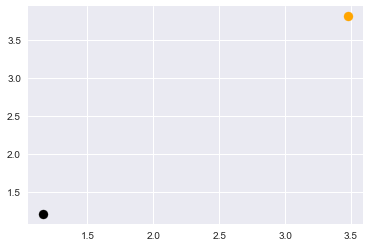

In [15]:
pt_one = 3 # 15
pt_one_ab = 48
pt = 48
plt.scatter(gaussian_2d_one[pt, 0], gaussian_2d_one[pt, 1], c='black', s=82)
pt_two = 23 # 44
pt_two_ab = 9
pt1 = 9
plt.scatter(gaussian_2d_two[pt1, 0], gaussian_2d_two[pt1, 1], c='orange', s=82)
plt.show()

#########  #########  #########  #########  #########  #########  #########

pt_one = 3
pt_one_ab = 48

blue_y_one = gaussian_2d_y.copy()
blue_y_one[3] = 1
blue_y_two = gaussian_2d_y.copy()
blue_y_two[48] = 1

pt_two = 23
pt_two_ab = 9

red_y_one = gaussian_2d_y.copy()
red_y_one[50+23] = 0
red_y_two = gaussian_2d_y.copy()
red_y_two[50+9] = 0

In [16]:
clf_b1 = KNeighborsClassifier(n_neighbors=1)
clf_b1.fit(gaussian_2d_X, blue_y_one)

clf_b2 = KNeighborsClassifier(n_neighbors=1)
clf_b2.fit(gaussian_2d_X, blue_y_two)

clf_r1 = KNeighborsClassifier(n_neighbors=1)
clf_r1.fit(gaussian_2d_X, red_y_one)

clf_r2 = KNeighborsClassifier(n_neighbors=1)
clf_r2.fit(gaussian_2d_X, red_y_two)

KNeighborsClassifier(n_neighbors=1)

In [17]:
def get_boudnary(Z):  # x_min, y_min, plot_step
    x_boundary = []
    y_boundary = []
    for i in range(Z.shape[1]):
        index = (np.where(Z[:, i] == 1))[0].min()

        x_boundary.append(x_min + i * plot_step)
        y_boundary.append(y_min + index * plot_step)
    boundary = np.array([x_boundary, y_boundary]).T
    return boundary

In [18]:
plot_step = 0.01
x_min, x_max = - 1, 5
y_min, y_max = - 1, 5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)
)

In [19]:
Z_b1 = clf_b1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_b1 = Z_b1.reshape(xx.shape)

Z_b2 = clf_b2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_b2 = Z_b2.reshape(xx.shape)

Z_r1 = clf_r1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_r1 = Z_r1.reshape(xx.shape)

Z_r2 = clf_r2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_r2 = Z_r2.reshape(xx.shape)

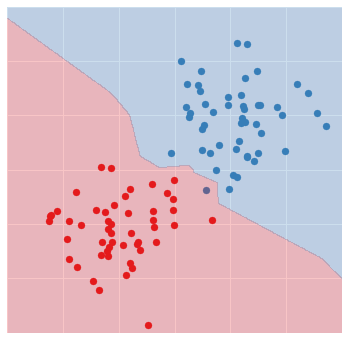

In [20]:
plt.figure(figsize=(6, 6))

c_1 = np.asarray([plt.cm.Set1(0)])  # np.asarray([plt.cm.Pastel1.colors[0]])
c_2 = np.asarray([plt.cm.Set1(1)])  # np.asarray([plt.cm.Pastel1.colors[1]])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.scatter(gaussian_2d_one[:, 0], gaussian_2d_one[:, 1], c=c_1)
plt.scatter(gaussian_2d_two[:, 0], gaussian_2d_two[:, 1], c=c_2)

plt.tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(
    axis='y', which='both', left=False, right=False, labelleft=False)

#plt.plot(boundary[:, 0], boundary[:, 1], **ls_y, label='2 blue mistakes')
#plt.contour(xx, yy, Z, levels=0, colors='green', linewidths=3, linestyles='--')
plt.contourf(xx, yy, Z_r1, colors=[c_1[0], c_2[0]], alpha=.25, levels=[0, .5, 1])  # cmap=plt.cm.Set1, levels=[0, 1.1], alpha=.5)  # plt.cm.RdYlBu

plt.savefig('./figures/neighbours_model_multiplicity_1_1.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

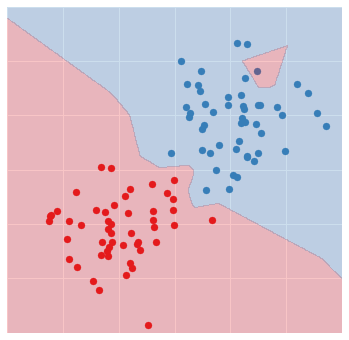

In [21]:
plt.figure(figsize=(6, 6))

c_1 = np.asarray([plt.cm.Set1(0)])  # np.asarray([plt.cm.Pastel1.colors[0]])
c_2 = np.asarray([plt.cm.Set1(1)])  # np.asarray([plt.cm.Pastel1.colors[1]])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.scatter(gaussian_2d_one[:, 0], gaussian_2d_one[:, 1], c=c_1)
plt.scatter(gaussian_2d_two[:, 0], gaussian_2d_two[:, 1], c=c_2)

plt.tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(
    axis='y', which='both', left=False, right=False, labelleft=False)

#plt.plot(boundary[:, 0], boundary[:, 1], **ls_y, label='2 blue mistakes')
#plt.contour(xx, yy, Z, levels=0, colors='green', linewidths=3, linestyles='--')
plt.contourf(xx, yy, Z_r2, colors=[c_1[0], c_2[0]], alpha=.25, levels=[0, .5, 1])  # cmap=plt.cm.Set1, levels=[0, 1.1], alpha=.5)  # plt.cm.RdYlBu

plt.savefig('./figures/neighbours_model_multiplicity_1_2.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

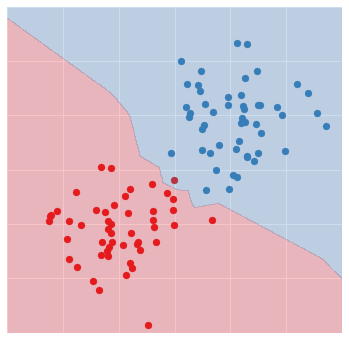

In [22]:
plt.figure(figsize=(6, 6))

c_1 = np.asarray([plt.cm.Set1(0)])  # np.asarray([plt.cm.Pastel1.colors[0]])
c_2 = np.asarray([plt.cm.Set1(1)])  # np.asarray([plt.cm.Pastel1.colors[1]])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.scatter(gaussian_2d_one[:, 0], gaussian_2d_one[:, 1], c=c_1)
plt.scatter(gaussian_2d_two[:, 0], gaussian_2d_two[:, 1], c=c_2)

plt.tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(
    axis='y', which='both', left=False, right=False, labelleft=False)

#plt.plot(boundary[:, 0], boundary[:, 1], **ls_y, label='2 blue mistakes')
#plt.contour(xx, yy, Z, levels=0, colors='green', linewidths=3, linestyles='--')
plt.contourf(xx, yy, Z_b1, colors=[c_1[0], c_2[0]], alpha=.25, levels=[0, .5, 1])  # cmap=plt.cm.Set1, levels=[0, 1.1], alpha=.5)  # plt.cm.RdYlBu

plt.savefig('./figures/neighbours_model_multiplicity_1_3.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

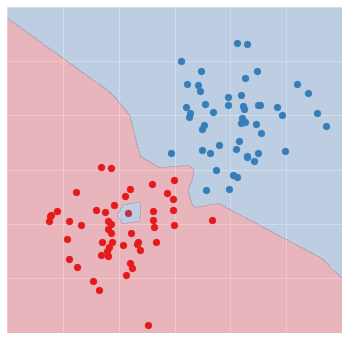

In [23]:
plt.figure(figsize=(6, 6))

c_1 = np.asarray([plt.cm.Set1(0)])  # np.asarray([plt.cm.Pastel1.colors[0]])
c_2 = np.asarray([plt.cm.Set1(1)])  # np.asarray([plt.cm.Pastel1.colors[1]])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.scatter(gaussian_2d_one[:, 0], gaussian_2d_one[:, 1], c=c_1)
plt.scatter(gaussian_2d_two[:, 0], gaussian_2d_two[:, 1], c=c_2)

plt.tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(
    axis='y', which='both', left=False, right=False, labelleft=False)

#plt.plot(boundary[:, 0], boundary[:, 1], **ls_y, label='2 blue mistakes')
#plt.contour(xx, yy, Z, levels=0, colors='green', linewidths=3, linestyles='--')
plt.contourf(xx, yy, Z_b2, colors=[c_1[0], c_2[0]], alpha=.25, levels=[0, .5, 1])  # cmap=plt.cm.Set1, levels=[0, 1.1], alpha=.5)  # plt.cm.RdYlBu

plt.savefig('./figures/neighbours_model_multiplicity_1_4.pdf', dpi=300, bbox_inches='tight', pad_inches=0)